<a href="https://colab.research.google.com/github/1kaiser/test2023/blob/main/ERA5_data_downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## save credentials

In [ ]:
!echo $HOME

/root


In [ ]:
%%writefile ~/.cdsapirc
url: https://cds.climate.copernicus.eu/api/v2
key: 147743:7722614e-e16b-4ef1-9677-989193bebf24

Writing /root/.cdsapirc


pre requisites

In [ ]:
!pip install cdsapi pygrib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 35.3 MB/s eta 0:00:00
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12008 sha256=8867fb6d6cef957e412c5dbf8d56ac7c559047b4d6b96aa118543ec9718e139b
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


## downloader

visualize

2023-09-03 12:15:40,754 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-03 12:15:40,757 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-03 12:15:40,935 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-03 12:15:40,938 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/adaptor.mars.internal-1693741595.968646-6720-15-859d1208-0129-498a-b69e-87b1d446f493.grib to single.grib (672.2K)
INFO:cdsapi:Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/adaptor.mars.internal-1693741595.968646-6720-15-859d1208-0129-498a-b69e-87b1d446f493.grib to single.grib (672.2K)
2023-09-03 12:15:42,088 INFO Download rate 586K/s
INFO:cdsapi:Download rate 586K/s


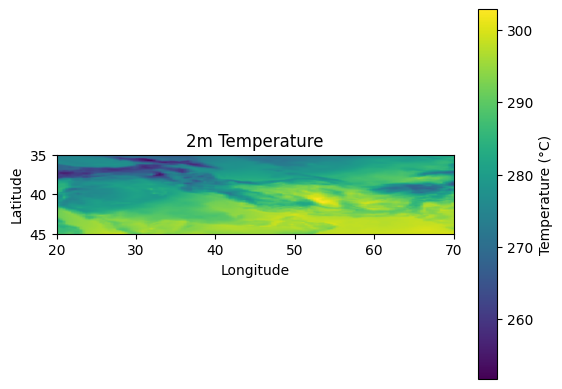

In [ ]:
# @title Default title text { vertical-output: true }
import cdsapi
import pygrib
import matplotlib.pyplot as plt
import numpy as np

def retrieve_era5_data(year, month, days, times, area, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': ['2m_temperature'],  # Only retrieve 2m temperature
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'grib',
        },
        output_file)

# Example usage:
year = '2022'
month = '03'
days = ['13', '14', '15']
times = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
area = [45, 35, 20, 70]  # North, West, South, East
output_file = 'single.grib'

retrieve_era5_data(year, month, days, times, area, output_file)


# Read the GRIB file using pygrib
grbs = pygrib.open(output_file)

# Extract the temperature data
temperature = []
for grb in grbs:
    if grb['name'] == '2 metre temperature':
        temperature.append(grb['values'])

# Create a combined array for temperature data
temperature_data = np.array(temperature)

# Plot the temperature
plt.imshow(temperature_data[0], extent=(area[2], area[3], area[0], area[1]), origin='upper')
plt.colorbar(label='Temperature (°C)')
plt.title('2m Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
# @title test { vertical-output: true }
import cdsapi
import pygrib
import matplotlib.pyplot as plt
import numpy as np

def retrieve_era5_data(year, month, days, times, area, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': ['total_precipitation'],  # Only retrieve total_precipitation
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'netcdf',
        },
        output_file)

# Example usage:
year = [
            '1940', '1941', '1942',
            '1943', '1944', '1945',
            '1946', '1947', '1948',
            '1949', '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', '2023',
        ]
month = [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ]
days = [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ]
times = [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ]
area = [
            28.5, 80.25, 27,
            80.75,
        ]  # North, West, South, East

output_file = 'single.nc'

# retrieve_era5_data(year, month, days, times, area, output_file)


# # Read the GRIB file using pygrib
# grbs = pygrib.open(output_file)

# # Extract the temperature data
# temperature = []
# for grb in grbs:
#     if grb['name'] == '2 metre temperature':
#         temperature.append(grb['values'])

# # Create a combined array for temperature data
# temperature_data = np.array(temperature)

# # Plot the temperature
# plt.imshow(temperature_data[0], extent=(area[2], area[3], area[0], area[1]), origin='upper')
# plt.colorbar(label='Temperature (°C)')
# plt.title('2m Temperature')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.show()


In [ ]:
for i in range(1,len(year)):
  retrieve_era5_data(year[i], month, days, times, area, 'single_'+str(year[i])+'.nc')
  print(output_file)

2023-09-13 17:30:58,128 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-13 17:30:58,138 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-13 17:30:58,295 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-13 17:30:58,300 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1694622330.598182-25866-18-ade7d4a0-5e6e-48a7-9bb3-f73c12c1f520.nc to single_1941.nc (394.6K)
INFO:cdsapi:Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1694622330.598182-25866-18-ade7d4a0-5e6e-48a7-9bb3-f73c12c1f520.nc to single_1941.nc (394.6K)
2023-09-13 17:30:59,406 INFO Download rate 359.3K/s
INFO:cdsapi:Download rate 359.3K/s
2023-09-13 17:30:59,627 INFO Welcome to the CDS
INF

single_1943.nc


2023-09-13 17:30:59,842 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-13 17:30:59,843 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1694623223.3233185-22985-7-837b6e94-c33c-44a5-b0a3-fc3f19ddb8b8.nc to single_1942.nc (394.6K)
INFO:cdsapi:Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1694623223.3233185-22985-7-837b6e94-c33c-44a5-b0a3-fc3f19ddb8b8.nc to single_1942.nc (394.6K)
2023-09-13 17:31:00,941 INFO Download rate 360.2K/s
INFO:cdsapi:Download rate 360.2K/s
2023-09-13 17:31:01,157 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-13 17:31:01,162 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


single_1943.nc


2023-09-13 17:31:01,311 INFO Request is queued
INFO:cdsapi:Request is queued


HTTPError: ignored

In [ ]:
async def fetch_data(url):
    response = await aiohttp.get(url)

for i in range(1,len(year)):
  output_file = 'single_'+str(year[i])+'.nc'
  fetch_data(retrieve_era5_data(year[i], month, days, times, area, output_file))
  print(output_file)

    # Continue processing after the response is received


2023-09-13 17:28:22,692 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-13 17:28:22,696 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-13 17:28:22,847 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-13 17:28:22,849 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1694622330.598182-25866-18-ade7d4a0-5e6e-48a7-9bb3-f73c12c1f520.nc to single_1941.nc (394.6K)
INFO:cdsapi:Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/adaptor.mars.internal-1694622330.598182-25866-18-ade7d4a0-5e6e-48a7-9bb3-f73c12c1f520.nc to single_1941.nc (394.6K)
2023-09-13 17:28:24,003 INFO Download rate 343K/s
INFO:cdsapi:Download rate 343K/s
<ipython-input-5-084333ad7a7c>:6: RuntimeWarning: corou

single_1941.nc


2023-09-13 17:28:24,443 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-13 17:28:24,445 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1694623223.3233185-22985-7-837b6e94-c33c-44a5-b0a3-fc3f19ddb8b8.nc to single_1942.nc (394.6K)
INFO:cdsapi:Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/adaptor.mars.internal-1694623223.3233185-22985-7-837b6e94-c33c-44a5-b0a3-fc3f19ddb8b8.nc to single_1942.nc (394.6K)
2023-09-13 17:28:26,200 INFO Download rate 225.1K/s
INFO:cdsapi:Download rate 225.1K/s
2023-09-13 17:28:26,422 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-13 17:28:26,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


single_1942.nc


2023-09-13 17:28:26,558 INFO Request is queued
INFO:cdsapi:Request is queued
2023-09-13 17:28:27,672 INFO Request is running
INFO:cdsapi:Request is running


KeyboardInterrupt: ignored



```
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': [
            '1940', '1941', '1942',
            '1943', '1944', '1945',
            '1946', '1947', '1948',
            '1949', '1950', '1951',
            '1952', '1953', '1954',
            '1955', '1956', '1957',
            '1958', '1959', '1960',
            '1961', '1962', '1963',
            '1964', '1965', '1966',
            '1967', '1968', '1969',
            '1970', '1971', '1972',
            '1973', '1974', '1975',
            '1976', '1977', '1978',
            '1979', '1980', '1981',
            '1982', '1983', '1984',
            '1985', '1986', '1987',
            '1988', '1989', '1990',
            '1991', '1992', '1993',
            '1994', '1995', '1996',
            '1997', '1998', '1999',
            '2000', '2001', '2002',
            '2003', '2004', '2005',
            '2006', '2007', '2008',
            '2009', '2010', '2011',
            '2012', '2013', '2014',
            '2015', '2016', '2017',
            '2018', '2019', '2020',
            '2021', '2022', '2023',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '08:00',
        'area': [
            28.5, 80.25, 27,
            80.75,
        ],
    },
    'download.nc')

```



test case

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
            '2m_temperature', 'geopotential', 'land_sea_mask',
            'leaf_area_index_high_vegetation', 'mean_sea_level_pressure', 'sea_ice_cover',
            'sea_surface_temperature', 'snow_depth', 'soil_temperature_level_1',
            'soil_temperature_level_2', 'soil_temperature_level_3', 'soil_temperature_level_4',
            'soil_type', 'surface_latent_heat_flux', 'surface_pressure',
            'top_net_solar_radiation_clear_sky', 'total_precipitation', 'volumetric_soil_water_layer_1',
            'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
            'skin_temperature',
        ],
        'year': '2022',
        'month': '03',
        'day': [
            '13', '14', '15',
        ],
        'time': [
            '00:00', '03:00', '06:00',
            '09:00', '12:00', '15:00',
            '18:00', '21:00',
        ],
        'area': [
            45, 35, 20,
            70, #North, West, South, East
        ],
        'format': 'grib',
    },
    'single.grib')

2023-09-03 11:30:52,099 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-03 11:30:52,102 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-03 11:30:52,277 INFO Request is queued
INFO:cdsapi:Request is queued
2023-09-03 11:30:53,399 INFO Request is running
INFO:cdsapi:Request is running
2023-09-03 11:31:13,794 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-03 11:31:13,798 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1693740652.5444672-31901-11-0c4c0486-e1de-4473-a7a4-4fb8d85eb69d.grib to single.grib (16.7M)
INFO:cdsapi:Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1693740652.5444672-31901-11-0c4c0486-e1de-4473-a7a4-4fb8d85eb69d.grib to single.grib (16.

Result(content_length=17530560,content_type=application/x-grib,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/adaptor.mars.internal-1693740652.5444672-31901-11-0c4c0486-e1de-4473-a7a4-4fb8d85eb69d.grib)

era5_surface.py

In [ ]:
import cdsapi

def retrieve_era5_data(year, month, days, times, area, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': [
                '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                '2m_temperature', 'geopotential', 'land_sea_mask',
                'leaf_area_index_high_vegetation', 'mean_sea_level_pressure', 'sea_ice_cover',
                'sea_surface_temperature', 'snow_depth', 'soil_temperature_level_1',
                'soil_temperature_level_2', 'soil_temperature_level_3', 'soil_temperature_level_4',
                'soil_type', 'surface_latent_heat_flux', 'surface_pressure',
                'top_net_solar_radiation_clear_sky', 'total_precipitation', 'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
                'skin_temperature',
            ],
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'grib',
        },
        output_file)

# Example usage:
year = '2023'
month = '09'
days = ['8', '9', '10']
times = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
area = [30.5, 67.9, 20.5, 79.9]  # North, West, South, East
output_file = 'single.grib'

retrieve_era5_data(year, month, days, times, area, output_file)


2023-09-16 15:40:20,685 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-16 15:40:20,688 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-16 15:40:20,934 INFO Request is queued
INFO:cdsapi:Request is queued
2023-09-16 15:40:22,069 INFO Request is running
INFO:cdsapi:Request is running
2023-09-16 15:40:42,526 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-16 15:40:42,530 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1694878821.289116-26021-20-6398760d-d225-4d1f-bfb0-0e68684cd187.grib to single.grib (2.4M)
INFO:cdsapi:Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data8/adaptor.mars.internal-1694878821.289116-26021-20-6398760d-d225-4d1f-bfb0-0e68684cd187.grib to single.

era5_level.py

In [ ]:
import cdsapi

def retrieve_era5_data(year, month, days, times, area, pressure, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-pressure-levels',
        {
            'product_type': 'reanalysis',
            'variable': [
                'geopotential', 'relative_humidity', 'specific_humidity',
            'temperature', 'u_component_of_wind', 'v_component_of_wind',
            ],
            'pressure_level': pressure,
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'grib',
        },
        output_file)

# Example usage:
year = '2023'
month = '09'
days = ['8', '9', '10']
times = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
area = [30.5, 67.9, 20.5, 79.9]  # North, West, South, East
pressure_lvl = [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ]
output_file = 'singler.grib'

retrieve_era5_data(year, month, days, times, area, pressure_lvl, output_file)


2023-09-16 15:43:01,606 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-16 15:43:01,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-09-16 15:43:01,782 INFO Request is queued
INFO:cdsapi:Request is queued
2023-09-16 15:43:02,916 INFO Request is running
INFO:cdsapi:Request is running
2023-09-16 15:45:54,373 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-16 15:45:54,378 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/adaptor.mars.internal-1694878982.2543592-17455-2-b0557892-eb02-4e2c-b68d-fed63c42f88b.grib to singler.grib (21.3M)
INFO:cdsapi:Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/adaptor.mars.internal-1694878982.2543592-17455-2-b0557892-eb02-4e2c-b68d-fed63c42f88b.grib to s

merged levels+surface [**source**](https://github.com/anikfal/atmospheric_science)

In [ ]:
import cdsapi

def retrieve_era5_data(year, month, days, times, area, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': [
                '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                '2m_temperature', 'geopotential', 'land_sea_mask',
                'leaf_area_index_high_vegetation', 'mean_sea_level_pressure', 'sea_ice_cover',
                'sea_surface_temperature', 'snow_depth', 'soil_temperature_level_1',
                'soil_temperature_level_2', 'soil_temperature_level_3', 'soil_temperature_level_4',
                'soil_type', 'surface_latent_heat_flux', 'surface_pressure',
                'top_net_solar_radiation_clear_sky', 'total_precipitation', 'volumetric_soil_water_layer_1',
                'volumetric_soil_water_layer_2', 'volumetric_soil_water_layer_3', 'volumetric_soil_water_layer_4',
                'skin_temperature',
            ],
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'grib',
        },
        output_file)

# Example usage:
year = '2023'
month = '09'
days = ['8', '9', '10']
times = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
area = [30.5, 67.9, 20.5, 79.9]  # North, West, South, East
output_file = 'single.grib'

retrieve_era5_data(year, month, days, times, area, output_file)


################################################################################
def retrieve_era5_data(year, month, days, times, area, pressure, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-pressure-levels',
        {
            'product_type': 'reanalysis',
            'variable': [
                'geopotential', 'relative_humidity', 'specific_humidity',
            'temperature', 'u_component_of_wind', 'v_component_of_wind',
            ],
            'pressure_level': pressure,
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'grib',
        },
        output_file)


pressure_lvl = [
            '1', '2', '3',
            '5', '7', '10',
            '20', '30', '50',
            '70', '100', '125',
            '150', '175', '200',
            '225', '250', '300',
            '350', '400', '450',
            '500', '550', '600',
            '650', '700', '750',
            '775', '800', '825',
            '850', '875', '900',
            '925', '950', '975',
            '1000',
        ]
output_file = 'singler.grib'

retrieve_era5_data(year, month, days, times, area, pressure_lvl, output_file)

test netCDF

In [ ]:
# @title Default title text { vertical-output: true }
import cdsapi
import pygrib
import matplotlib.pyplot as plt
import numpy as np

def retrieve_era5_data(year, month, days, times, area, output_file):
    c = cdsapi.Client()

    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': ['2m_temperature'],  # Only retrieve 2m temperature
            'year': year,
            'month': month,
            'day': days,
            'time': times,
            'area': area,
            'format': 'netCDF',
        },
        output_file)

# Example usage:
year = '2022'
month = '03'
days = ['13', '14', '15']
times = ['00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']
area = [45, 35, 20, 70]  # North, West, South, East
output_file = 'single.nc'

retrieve_era5_data(year, month, days, times, area, output_file)

2023-09-03 12:19:56,225 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-09-03 12:19:56,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2023-09-03 12:19:56,386 INFO Request is queued
INFO:cdsapi:Request is queued
2023-09-03 12:19:57,500 INFO Request is running
INFO:cdsapi:Request is running
2023-09-03 12:19:59,113 INFO Request is completed
INFO:cdsapi:Request is completed
2023-09-03 12:19:59,117 INFO Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data1/adaptor.mars.internal-1693743596.4856322-30184-20-183ab5d9-1656-4bbd-ba4a-51f8ebb94cee.grib to single.nc (672.2K)
INFO:cdsapi:Downloading https://download-0007-clone.copernicus-climate.eu/cache-compute-0007/cache/data1/adaptor.mars.internal-1693743596.4856322-30184-20-183ab5d9-1656-4bbd-ba4a-51f8ebb94cee.grib to singl